# Proyecto 1 - Obtención y Limpieza de los datos
## Data Science
**Integrantes**
- Gustavo Gonzalez
- Pablo Orellana
- Diego Leiva
- Maria Ramirez
-----------------------------------------------------------------------------
En esta primera etapa se realizan los siguientes avances para el proyecto 1 del curso, incluyendo:
- Describir el set de datos
- Listar las variables que mas operaciones de limpieza necesitan
- Especificar la estrategia para limpiar el conjunto de datos

### Comprensión Inicial

#### Importar Librerías

In [1]:
# Manejo de archivos
import os 

# Manipulacion de datos
import pandas as pd
import numpy as np
import unicodedata

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utilidades
import re

#### Cargar el Dataset al entorno

Datos obtenidos de-> https://www.mineduc.gob.gt/BUSCAESTABLECIMIENTO_GE/

In [2]:
# Ruta de la carpeta
folder_path = 'data'

# Obtener los nombres de los archivos
file_names = [file for file in os.listdir(folder_path) if file.endswith('.csv') and not file.startswith('~')]

# Diccionario para almacenar los dataframes
data_frames = {}

# Iterar sobre los nombres de los archivos
for file in file_names:
    # Construir la ruta del archivo
    file_path = os.path.join(folder_path, file)
    file_name = file.split('.')[0]
    
    # Leer el archivo csv y almacenarlo en un dataframe
    df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    
    # Guardar el dataframe en el diccionario con el nombre del archivo como clave
    data_frames[file_name] = df

# Mostrar los nombres de los archivos
print(f"Se cargaron un total de {len(data_frames)} archivos\n")
print('Archivos cargados:')
for key in data_frames.keys():
    print(f"\t- {key}")

Se cargaron un total de 23 archivos

Archivos cargados:
	- ALTA_VERAPAZ
	- BAJA_VERAPAZ
	- CHIMALTENANGO
	- CHIQUIMULA
	- CIUDAD_CAPITAL
	- EL_PROGRESO
	- ESCUINTLA
	- GUATEMALA
	- HUEHUETENANGO
	- IZABAL
	- JALAPA
	- JUTIAPA
	- PETEN
	- QUETZALTENANGO
	- QUICHE
	- RETALHULEU
	- SACATEPEQUEZ
	- SANTA_ROZA
	- SAN_MARCOS
	- SOLOLA
	- SUCHITEPEQUEZ
	- TOTONICAPAN
	- ZACAPA


#### Visualizar estructura e información general de cada dataset

In [3]:
def get_info(df):
    info = pd.DataFrame({
        'Columnas': df.columns,
        'Tipos': df.dtypes,
        'Nulos': df.isnull().sum(),
        'Nulos (%)': (df.isnull().sum() * 100 / df.shape[0]).round(2),
        'Únicos': df.nunique(),
        'Duplicados': df.duplicated().sum()
    }).reset_index(drop=True)

    # Mostrar la informacion
    print(f"El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas\n")
    display(info)

In [4]:
for dataset in data_frames.keys():
    print(f"Informacion del dataset: {dataset}")
    get_info(data_frames[dataset])
    print("\n",(100*'-'),"\n")

Informacion del dataset: ALTA_VERAPAZ
El dataframe tiene 374 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,374,0
1,DISTRITO,object,2,0.53,40,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,17,0
4,ESTABLECIMIENTO,object,0,0.00,183,0
5,DIRECCION,object,2,0.53,247,0
6,TELEFONO,object,20,5.35,227,0
7,SUPERVISOR,object,2,0.53,40,0
8,DIRECTOR,object,16,4.28,216,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: BAJA_VERAPAZ
El dataframe tiene 114 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,114,0
1,DISTRITO,object,1,0.88,15,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,8,0
4,ESTABLECIMIENTO,object,0,0.00,52,0
5,DIRECCION,object,0,0.00,71,0
6,TELEFONO,object,6,5.26,74,0
7,SUPERVISOR,object,1,0.88,15,0
8,DIRECTOR,object,6,5.26,73,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: CHIMALTENANGO
El dataframe tiene 359 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,359,0
1,DISTRITO,object,2,0.56,35,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,16,0
4,ESTABLECIMIENTO,object,0,0.00,225,0
5,DIRECCION,object,0,0.00,206,0
6,TELEFONO,object,14,3.90,194,0
7,SUPERVISOR,object,2,0.56,34,0
8,DIRECTOR,object,16,4.46,180,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: CHIQUIMULA
El dataframe tiene 170 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,170,0
1,DISTRITO,object,1,0.59,25,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,11,0
4,ESTABLECIMIENTO,object,0,0.00,104,0
5,DIRECCION,object,2,1.18,118,0
6,TELEFONO,object,18,10.59,104,0
7,SUPERVISOR,object,1,0.59,22,0
8,DIRECTOR,object,18,10.59,103,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: CIUDAD_CAPITAL
El dataframe tiene 1564 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,1564,0
1,DISTRITO,object,66,4.22,75,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,21,0
4,ESTABLECIMIENTO,object,0,0.00,1009,0
5,DIRECCION,object,5,0.32,1067,0
6,TELEFONO,object,102,6.52,843,0
7,SUPERVISOR,object,66,4.22,65,0
8,DIRECTOR,object,270,17.26,623,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: EL_PROGRESO
El dataframe tiene 125 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.0,125,0
1,DISTRITO,object,3,2.4,15,0
2,DEPARTAMENTO,object,0,0.0,1,0
3,MUNICIPIO,object,0,0.0,8,0
4,ESTABLECIMIENTO,object,0,0.0,76,0
5,DIRECCION,object,0,0.0,69,0
6,TELEFONO,object,13,10.4,78,0
7,SUPERVISOR,object,3,2.4,15,0
8,DIRECTOR,object,9,7.2,73,0
9,NIVEL,object,0,0.0,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: ESCUINTLA
El dataframe tiene 628 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,628,0
1,DISTRITO,object,10,1.59,23,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,14,0
4,ESTABLECIMIENTO,object,0,0.00,356,0
5,DIRECCION,object,2,0.32,447,0
6,TELEFONO,object,36,5.73,312,0
7,SUPERVISOR,object,10,1.59,22,0
8,DIRECTOR,object,61,9.71,275,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: GUATEMALA
El dataframe tiene 1479 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,1479,0
1,DISTRITO,object,54,3.65,89,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,17,0
4,ESTABLECIMIENTO,object,0,0.00,937,0
5,DIRECCION,object,3,0.20,1115,0
6,TELEFONO,object,81,5.48,904,0
7,SUPERVISOR,object,54,3.65,85,0
8,DIRECTOR,object,200,13.52,748,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: HUEHUETENANGO
El dataframe tiene 516 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,516,0
1,DISTRITO,object,5,0.97,52,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,32,0
4,ESTABLECIMIENTO,object,0,0.00,312,0
5,DIRECCION,object,4,0.78,288,0
6,TELEFONO,object,25,4.84,323,0
7,SUPERVISOR,object,5,0.97,47,0
8,DIRECTOR,object,36,6.98,297,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: IZABAL
El dataframe tiene 368 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,368,0
1,DISTRITO,object,2,0.54,21,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,5,0
4,ESTABLECIMIENTO,object,0,0.00,205,0
5,DIRECCION,object,0,0.00,199,0
6,TELEFONO,object,13,3.53,203,0
7,SUPERVISOR,object,2,0.54,21,0
8,DIRECTOR,object,5,1.36,190,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: JALAPA
El dataframe tiene 151 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,151,0
1,DISTRITO,object,0,0.00,15,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,7,0
4,ESTABLECIMIENTO,object,0,0.00,93,0
5,DIRECCION,object,2,1.32,108,0
6,TELEFONO,object,6,3.97,93,0
7,SUPERVISOR,object,0,0.00,15,0
8,DIRECTOR,object,9,5.96,92,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: JUTIAPA
El dataframe tiene 310 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,310,0
1,DISTRITO,object,6,1.94,36,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,17,0
4,ESTABLECIMIENTO,object,0,0.00,197,0
5,DIRECCION,object,6,1.94,170,0
6,TELEFONO,float64,18,5.81,180,0
7,SUPERVISOR,object,6,1.94,34,0
8,DIRECTOR,object,23,7.42,167,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: PETEN
El dataframe tiene 366 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,366,0
1,DISTRITO,object,10,2.73,37,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,14,0
4,ESTABLECIMIENTO,object,0,0.00,263,0
5,DIRECCION,object,8,2.19,195,0
6,TELEFONO,object,30,8.20,236,0
7,SUPERVISOR,object,10,2.73,35,0
8,DIRECTOR,object,17,4.64,225,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: QUETZALTENANGO
El dataframe tiene 491 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,491,0
1,DISTRITO,object,18,3.67,37,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,24,0
4,ESTABLECIMIENTO,object,0,0.00,321,0
5,DIRECCION,object,2,0.41,369,0
6,TELEFONO,object,26,5.30,311,0
7,SUPERVISOR,object,18,3.67,36,0
8,DIRECTOR,object,54,11.00,256,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: QUICHE
El dataframe tiene 244 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,244,0
1,DISTRITO,object,1,0.41,39,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,21,0
4,ESTABLECIMIENTO,object,0,0.00,166,0
5,DIRECCION,object,0,0.00,180,0
6,TELEFONO,float64,9,3.69,162,0
7,SUPERVISOR,object,1,0.41,39,0
8,DIRECTOR,object,9,3.69,166,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: RETALHULEU
El dataframe tiene 316 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,316,0
1,DISTRITO,object,2,0.63,9,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,9,0
4,ESTABLECIMIENTO,object,0,0.00,176,0
5,DIRECCION,object,0,0.00,212,0
6,TELEFONO,float64,15,4.75,177,0
7,SUPERVISOR,object,2,0.63,8,0
8,DIRECTOR,object,18,5.70,156,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: SACATEPEQUEZ
El dataframe tiene 319 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,319,0
1,DISTRITO,object,2,0.63,12,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,16,0
4,ESTABLECIMIENTO,object,0,0.00,192,0
5,DIRECCION,object,0,0.00,234,0
6,TELEFONO,object,12,3.76,206,0
7,SUPERVISOR,object,3,0.94,11,0
8,DIRECTOR,object,31,9.72,176,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: SANTA_ROZA
El dataframe tiene 157 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,157,0
1,DISTRITO,object,1,0.64,23,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,14,0
4,ESTABLECIMIENTO,object,0,0.00,101,0
5,DIRECCION,object,2,1.27,93,0
6,TELEFONO,object,7,4.46,101,0
7,SUPERVISOR,object,1,0.64,22,0
8,DIRECTOR,object,11,7.01,96,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: SAN_MARCOS
El dataframe tiene 574 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,574,0
1,DISTRITO,object,12,2.09,72,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,30,0
4,ESTABLECIMIENTO,object,0,0.00,252,0
5,DIRECCION,object,5,0.87,296,0
6,TELEFONO,object,35,6.10,313,0
7,SUPERVISOR,object,12,2.09,71,0
8,DIRECTOR,object,35,6.10,286,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: SOLOLA
El dataframe tiene 138 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,138,0
1,DISTRITO,object,1,0.72,24,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,16,0
4,ESTABLECIMIENTO,object,0,0.00,95,0
5,DIRECCION,object,3,2.17,110,0
6,TELEFONO,float64,8,5.80,100,0
7,SUPERVISOR,object,1,0.72,24,0
8,DIRECTOR,object,8,5.80,95,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: SUCHITEPEQUEZ
El dataframe tiene 385 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,385,0
1,DISTRITO,object,6,1.56,25,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,19,0
4,ESTABLECIMIENTO,object,0,0.00,197,0
5,DIRECCION,object,3,0.78,197,0
6,TELEFONO,object,28,7.27,191,0
7,SUPERVISOR,object,6,1.56,24,0
8,DIRECTOR,object,37,9.61,164,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: TOTONICAPAN
El dataframe tiene 90 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,90,0
1,DISTRITO,object,1,1.11,15,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,8,0
4,ESTABLECIMIENTO,object,0,0.00,57,0
5,DIRECCION,object,1,1.11,60,0
6,TELEFONO,object,6,6.67,55,0
7,SUPERVISOR,object,1,1.11,15,0
8,DIRECTOR,object,4,4.44,48,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: ZACAPA
El dataframe tiene 93 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,93,0
1,DISTRITO,object,2,2.15,18,0
2,DEPARTAMENTO,object,0,0.00,1,0
3,MUNICIPIO,object,0,0.00,11,0
4,ESTABLECIMIENTO,object,0,0.00,65,0
5,DIRECCION,object,1,1.08,62,0
6,TELEFONO,float64,7,7.53,67,0
7,SUPERVISOR,object,2,2.15,17,0
8,DIRECTOR,object,4,4.30,69,0
9,NIVEL,object,0,0.00,1,0



 ---------------------------------------------------------------------------------------------------- 



In [5]:
flag = False

# Obtener la lista de columnas de un dataframe
first_df_columns = list(data_frames.values())[0].columns.tolist()

# Comprobar si todas las columnas de los dataframes son iguales
all_same_columns = all(df.columns.tolist() == first_df_columns for df in data_frames.values())

if all_same_columns:
    print("Todos los dataframes tienen las mismas columnas.")
    print("Se pueden concatenar en un solo dataframe.")
    flag = True
else:
    print("PROBLEMA: Los dataframes no tienen las mismas columnas.")
    print("No se pueden concatenar en un solo dataframe.")
    flag = False


Todos los dataframes tienen las mismas columnas.
Se pueden concatenar en un solo dataframe.


#### Unificar los daframes en uno solo

Dado que todos los archivos poseen la misma estructura es posible integrarlos en unico dataframe

In [6]:
# Concatenar los dataframes en un solo dataframe
if flag:
    dataset = pd.concat(data_frames.values())
    dataset.reset_index(drop=True, inplace=True)
    get_info(dataset)

El dataframe tiene 9331 filas y 17 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,CODIGO,object,0,0.00,9331,0
1,DISTRITO,object,208,2.23,690,0
2,DEPARTAMENTO,object,0,0.00,23,0
3,MUNICIPIO,object,0,0.00,349,0
4,ESTABLECIMIENTO,object,0,0.00,5319,0
5,DIRECCION,object,51,0.55,6005,0
6,TELEFONO,object,535,5.73,5439,0
7,SUPERVISOR,object,209,2.24,658,0
8,DIRECTOR,object,897,9.61,4677,0
9,NIVEL,object,0,0.00,1,0


In [7]:
dataset.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,16-01-0138-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO COBAN,KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8,77945104,MERCEDES JOSEFINA TORRES GALVEZ,GUSTAVO ADOLFO SIERRA POP,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,KM 209.5 ENTRADA A LA CIUDAD,77367402,MERCEDES JOSEFINA TORRES GALVEZ,GILMA DOLORES GUAY PAZ DE LEAL,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
2,16-01-0140-46,16-031,ALTA VERAPAZ,COBAN,"COLEGIO ""LA INMACULADA""",7A. AVENIDA 11-109 ZONA 6,78232301,MERCEDES JOSEFINA TORRES GALVEZ,VIRGINIA SOLANO SERRANO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
3,16-01-0141-46,16-005,ALTA VERAPAZ,COBAN,ESCUELA NACIONAL DE CIENCIAS COMERCIALES,2A CALLE 11-10 ZONA 2,79514215,RUDY ADOLFO TOT OCH,HÉCTOR ROLANDO CHUN POOU,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
4,16-01-0142-46,16-005,ALTA VERAPAZ,COBAN,INSTITUTO NORMAL MIXTO DEL NORTE 'EMILIO ROSAL...,3A AVE 6-23 ZONA 11,79521468,RUDY ADOLFO TOT OCH,VICTOR HUGO DOMÍNGUEZ REYES,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,BILINGUE,VESPERTINA,DIARIO(REGULAR),ALTA VERAPAZ


## Limpieza de Datos

### Valores faltantes

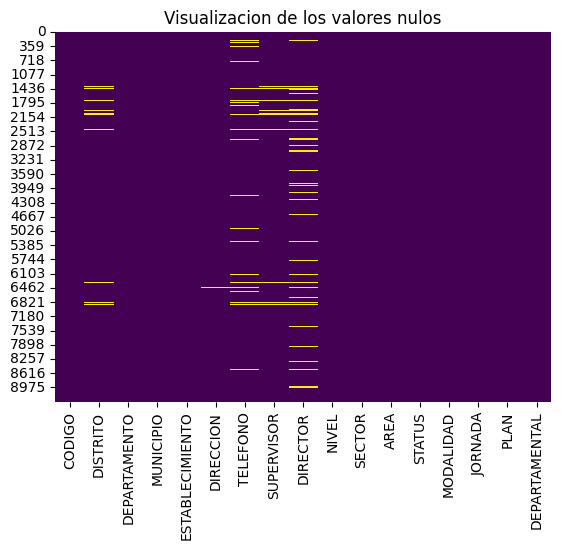

In [8]:
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=False)

plt.title("Visualizacion de los valores nulos")
plt.show()

Se decidió no realizar imputación de datos debido a la incertidumbre sobre el objetivo final de los mismos, lo que hace que la imputación no sea conveniente en este caso.
La razon de dejar los valores nulos dentro del dataset es para permitir a otros el tener la ultima decision de que hacer con ellos, de esa forma se evita perder data importante eliminando esos registros.

### Validar Mayúsculas

In [9]:
def check_uppercase(df):
    object_columns = df.select_dtypes(include=['object']).columns
    
    def is_uppercase(x):
        if isinstance(x, str):
            return x == x.upper()
        return True
    
    uppercase_check = df[object_columns].apply(lambda col: col.map(is_uppercase))
    
    if uppercase_check.all().all():
        print("Todos los datos de tipo texto están en mayúsculas.")
    else:
        print("Hay datos que no están en mayúsculas.")
        print("Columnas con datos que no están en mayúsculas:")
        print(uppercase_check.all())

check_uppercase(dataset)

Hay datos que no están en mayúsculas.
Columnas con datos que no están en mayúsculas:
CODIGO              True
DISTRITO            True
DEPARTAMENTO        True
MUNICIPIO           True
ESTABLECIMIENTO     True
DIRECCION          False
TELEFONO           False
SUPERVISOR          True
DIRECTOR            True
NIVEL               True
SECTOR              True
AREA                True
STATUS              True
MODALIDAD           True
JORNADA             True
PLAN                True
DEPARTAMENTAL       True
dtype: bool


Como se puede observar, tenemos que todas las columnas tienen los datos en letras mayúsculas. La variable "DIRECCION" y la variable "TELEFONO" aparecen como "False" debido a que en el caso de "TELEFONO" los datos son numéricos y en la comulna "DIRECCION" tenemos strings con números y letras.

### Limpieza de Distrto

In [10]:
unique_values = dataset['DISTRITO'].unique
unique_values

<bound method Series.unique of 0       16-031
1       16-031
2       16-031
3       16-005
4       16-005
         ...  
9326    19-021
9327    19-021
9328    19-015
9329    19-015
9330    19-020
Name: DISTRITO, Length: 9331, dtype: object>

El distrito se da por un codigo de forma que no hay errores ortograficos que corregir ni conversion a mayusculas

### Limpieza de Sector

In [11]:
dataset['SECTOR'].unique()

array(['PRIVADO', 'OFICIAL', 'MUNICIPAL', 'COOPERATIVA'], dtype=object)

Hay 4 valores unicos en sector, ninguno cuenta con faltas ortograficas o errores. 

### Limpieza de AREA

In [12]:
dataset['AREA'].unique()

array(['URBANA', 'RURAL', 'SIN ESPECIFICAR'], dtype=object)

### Limpieza de Municipio

In [13]:
def remove_accents(text):
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')

# Open the text file
with open('dataForProcessing/municipios.txt', 'r', encoding='utf-8') as file:
    # Read the file and split each line
    lines = file.read().splitlines()

    # Process each line: strip, remove accents, and filter out empty items
    processed_list = [remove_accents(line.strip()).upper() for line in lines if line.strip()]

processed_list = set(processed_list)

# Find values in the column that are not in the set
invalid_values = dataset[~dataset['MUNICIPIO'].isin(processed_list)]

# Check if any such values exist
if not invalid_values.empty:
    print("There are values in the column that are not in the set:")
    print(invalid_values['MUNICIPIO'].unique())
else:
    print("All values in the column are in the set.")

There are values in the column that are not in the set:
['SAN MIGUEL TUCURU' 'SANTA MARIA CAHABON' 'LA TINTA' 'SANTA CRUZ EL CHOL'
 'SAN JUAN COMALAPA' 'SAN MIGUEL POCHUTA' 'SAN PEDRO YEPOCAPA'
 'QUEZALTEPEQUE' 'ZONA 1' 'ZONA 2' 'ZONA 3' 'ZONA 4' 'ZONA 5' 'ZONA 6'
 'ZONA 7' 'ZONA 8' 'ZONA 9' 'ZONA 10' 'ZONA 11' 'ZONA 12' 'ZONA 13'
 'ZONA 14' 'ZONA 15' 'ZONA 16' 'ZONA 17' 'ZONA 18' 'ZONA 19' 'ZONA 21'
 'ZONA 24' 'SAN MIGUEL PETAPA' 'SAN PEDRO SOLOMA'
 'SAN ILDEFONSO IXTAHUACAN' 'SANTA CRUZ BARILLAS' 'PETATAN'
 'SAN JUAN OSTUNCALCO' 'COLOMBA COSTA CUCA' 'GENOVA COSTA CUCA'
 'SANTO TOMAS CHICHICASTENANGO' 'SAN MIGUEL USPANTAN' 'PACHALUN'
 'PUEBLO NUEVO VIÑAS' 'SAN JOSE EL RODEO' 'SAN JOSE OJETENAM'
 'SAN BARTOLO AGUAS CALIENTES' 'CABAÑAS']


In [14]:
## Mapping 
name_map = {
    'SAN JOSE EL RODEO': 'EL RODEO',
    'SAN JOSE OJETENAM': 'SAN JOSE OJETENAN',
    'SANTA CRUZ EL CHOL': 'EL CHOL',
    'SAN MIGUEL TUCURU': 'TUCURU',
    'SANTA MARIA CAHABON': 'CAHABON',
    'LA TINTA': 'SANTA CATALINA LA TINTA',
    'QUEZALTEPEQUE': 'QUETZALTEPEQUE',
    'PUEBLO NUEVO VIÑAS' : 'PUEBLO NUEVO VINAS',
    'ZONA 1' : 'GUATEMALA',
    'ZONA 2' : 'GUATEMALA',
    'ZONA 3' : 'GUATEMALA',
    'ZONA 4' : 'GUATEMALA',
    'ZONA 5': 'GUATEMALA',
    'ZONA 6' : 'GUATEMALA',
    'ZONA 7' : 'GUATEMALA',
    'ZONA 8' : 'GUATEMALA',
    'ZONA 9' : 'GUATEMALA',
    'ZONA 10': 'GUATEMALA', 
    'ZONA 11': 'GUATEMALA', 
    'ZONA 12': 'GUATEMALA',
    'ZONA 13': 'GUATEMALA',
    'ZONA 14': 'GUATEMALA', 
    'ZONA 15': 'GUATEMALA', 
    'ZONA 16': 'GUATEMALA', 
    'ZONA 17': 'GUATEMALA', 
    'ZONA 18': 'GUATEMALA', 
    'ZONA 19': 'GUATEMALA',
    'ZONA 21': 'GUATEMALA',
    'ZONA 24': 'GUATEMALA',
    'CABAÑAS': 'CABANAS',
    'SI'
    'SAN JUAN COMALAPA': 'COMALAPA',
    'SAN MIGUEL POCHUTA': 'POCHUTA',
    'SAN PEDRO YEPOCAPA': 'YEPOCAPA',
    'SAN JUAN OSTUNCALCO': 'OSTUNCALCO',
    'COLOMBA COSTA CUCA' : 'COLOMBA',
    'GENOVA COSTA CUCA' : 'GENOVA',
    'SANTO TOMAS CHICHICASTENANGO' : 'CHICHICASTENANGO',
    'SAN MIGUEL USPANTAN' : 'USPANTAN',
    'PACHALUN' : 'PACHALUM',
    'SAN MIGUEL PETAPA' : 'PETAPA',
    'SAN PEDRO SOLOMA': 'SOLOMA',
    'SAN ILDEFONSO IXTAHUACAN' : 'IXTAHUACAN',
    'SANTA CRUZ BARILLAS' : 'BARILLAS',
    'PETATAN' : 'PETETAN',
    'SAN BARTOLO AGUAS CALIENTES': 'SAN BARTOLO'
}

# Replace the values in the specified column
dataset['MUNICIPIO'] = dataset['MUNICIPIO'].map(name_map).fillna(dataset['MUNICIPIO'])

### Revision de Columnas

In [15]:
dataset['NIVEL'].unique()

array(['DIVERSIFICADO'], dtype=object)

In [16]:
dataset['STATUS'].unique()

array(['ABIERTA', 'CERRADA TEMPORALMENTE', 'TEMPORAL NOMBRAMIENTO',
       'TEMPORAL TITULOS'], dtype=object)

In [17]:
dataset['MODALIDAD'].unique()

array(['MONOLINGUE', 'BILINGUE'], dtype=object)

In [18]:
dataset['JORNADA'].unique()

array(['MATUTINA', 'VESPERTINA', 'DOBLE', 'NOCTURNA', 'SIN JORNADA',
       'INTERMEDIA'], dtype=object)

In [19]:
dataset['PLAN'].unique()

array(['DIARIO(REGULAR)', 'FIN DE SEMANA', 'A DISTANCIA',
       'SEMIPRESENCIAL', 'SEMIPRESENCIAL (FIN DE SEMANA)',
       'SEMIPRESENCIAL (UN DÍA A LA SEMANA)', 'SABATINO',
       'SEMIPRESENCIAL (DOS DÍAS A LA SEMANA)', 'VIRTUAL A DISTANCIA',
       'DOMINICAL', 'MIXTO', 'INTERCALADO', 'IRREGULAR'], dtype=object)

In [20]:
dataset['DEPARTAMENTAL'].unique()

array(['ALTA VERAPAZ', 'BAJA VERAPAZ', 'CHIMALTENANGO', 'CHIQUIMULA',
       'GUATEMALA NORTE', 'GUATEMALA ORIENTE', 'GUATEMALA OCCIDENTE',
       'GUATEMALA SUR', 'EL PROGRESO', 'ESCUINTLA', 'HUEHUETENANGO',
       'IZABAL', 'JALAPA', 'JUTIAPA', 'PETÉN', 'QUETZALTENANGO', 'QUICHÉ',
       'QUICHÉ NORTE', 'RETALHULEU', 'SACATEPÉQUEZ', 'SANTA ROSA',
       'SAN MARCOS', 'SOLOLÁ', 'SUCHITEPÉQUEZ', 'TOTONICAPÁN', 'ZACAPA'],
      dtype=object)

### Verificar longitud de "CODIGO"

In [21]:
dataset['CODIGO_length'] = dataset['CODIGO'].apply(len)

# Comprobar si todas las longitudes son iguales
if dataset['CODIGO_length'].nunique() == 1:
    print("Todas las longitudes de los códigos son iguales.")
else:
    print("Hay variaciones en la longitud de los códigos.")
    print(dataset['CODIGO_length'].value_counts())

Todas las longitudes de los códigos son iguales.


Se puede observar que para la columna código se tiene que todas las longitudes son iguales

### Mayusculas y Errores Ortográficos Departamentos

In [22]:
# Lista oficial normalizada de nombres de departamentos
departamentos_oficiales = [
    "ALTA VERAPAZ", "BAJA VERAPAZ", "CHIMALTENANGO", "CHIQUIMULA",
    "EL PROGRESO", "ESCUINTLA", "CIUDAD CAPITAL", "HUEHUETENANGO",
    "IZABAL", "JALAPA", "JUTIAPA", "PETEN", "QUETZALTENANGO",
    "QUICHE", "RETALHULEU", "SACATEPEQUEZ", "SAN MARCOS", "SANTA ROSA",
    "SOLOLA", "SUCHITEPEQUEZ", "TOTONICAPAN", "ZACAPA", "GUATEMALA"
]

# Paso 1: Normalizar a mayúsculas y eliminar acentos en el dataset
def normalize_text(text):
    if isinstance(text, str):
        text = text.upper()
        text = text.strip()
        text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
    return text

dataset['DEPARTAMENTO'] = dataset['DEPARTAMENTO'].apply(normalize_text)

# Paso 2: Corregir errores ortográficos
def correct_spelling(value, correct_list):
    if value not in correct_list:
        print(f"Error ortográfico encontrado: {value}")
    return value

dataset['DEPARTAMENTO'] = dataset['DEPARTAMENTO'].apply(lambda x: correct_spelling(x, departamentos_oficiales))

print("Normalización y corrección completadas.")


Normalización y corrección completadas.


Se verificó que todos los departamentos se encuentren en mayúsculas, sin espacios innecesarios, sin acentos y con una lista para evitar errores ortográficos.

### Estandarizacion de Caracteres Especiales

Es necesario eliminar caracteres especiales como las tildes o las comillas para estandarizar los textos.

In [23]:
def limpiar_columna(df, columna):
    # Reemplazar comillas dobles y simples
    df[columna] = df[columna].str.replace('"', '', regex=False)
    df[columna] = df[columna].str.replace("'", '', regex=False)
    
    # Reemplazar letras con tildes por letras sin tildes
    df[columna] = df[columna].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8') if isinstance(x, str) else x)
    
    return df

In [24]:
dataset = limpiar_columna(dataset, 'ESTABLECIMIENTO')
dataset = limpiar_columna(dataset, 'DEPARTAMENTO')
dataset = limpiar_columna(dataset, 'DEPARTAMENTAL')

### Normalización de la columna "DIRECCION"

In [25]:
def normalize_direccion(text):
    if isinstance(text, str):
        # Convertir a mayúsculas
        text = text.upper()
        # Eliminar espacios adicionales
        text = text.strip()
        # Eliminar acentos y caracteres especiales
        text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
        text = re.sub(r'[^\w\s]', '', text)  
    return text

# Aplicar la normalización a la columna "DIRECCION"
dataset['DIRECCION'] = dataset['DIRECCION'].apply(normalize_direccion)

print("Normalización de 'DIRECCION' completada.")


Normalización de 'DIRECCION' completada.


En este apartado nos encargamos de encarga de convertir el texto a mayúsculas, eliminar espacios adicionales y remover caracteres especiales.

### TELEFONO

In [26]:

def format_telefono(phone):
    if isinstance(phone, str):
        digits = re.sub(r'[^\d]', '', phone)
        length = len(digits)
        
        if length % 8 == 0 or length % 4 == 0:
            formatted_numbers = [digits[i:i+8] for i in range(0, length, 8)]
            return ' '.join(formatted_numbers)
        else:
            print(f"Número de teléfono incorrecto: {phone}")
            return None  
    return phone

dataset['TELEFONO'] = dataset['TELEFONO'].apply(format_telefono)
print("Formateo de 'TELEFONO' completado con validación específica.")

Número de teléfono incorrecto: 783928
Número de teléfono incorrecto: 4225675
Número de teléfono incorrecto: 2517748 2384159
Número de teléfono incorrecto: 22202870-73
Número de teléfono incorrecto: 2202869-2202873
Número de teléfono incorrecto: 230835
Número de teléfono incorrecto: 2232068
Número de teléfono incorrecto: 2267425
Número de teléfono incorrecto: 2223228
Número de teléfono incorrecto: 2232379
Número de teléfono incorrecto: 2325732, 2320075, 2307014
Número de teléfono incorrecto: 238-4425,251-4792
Número de teléfono incorrecto: 238-4283/2384284
Número de teléfono incorrecto: 2325732, 2320075, 2307014
Número de teléfono incorrecto: 2325732, 2320075, 2307014
Número de teléfono incorrecto: 25,325,662,329,566
Número de teléfono incorrecto: 2329664-2500774
Número de teléfono incorrecto: 2517748-2384159
Número de teléfono incorrecto: 232-1011 y 251-6422
Número de teléfono incorrecto: 22881328 7089673
Número de teléfono incorrecto: 22791315-16
Número de teléfono incorrecto: 2250522

Se ha dejado los telefonos con formato incorrecto (numeros telefonicos que no contienen 8 digitos o no son un PBX), como valores nulos debido a que son valores perdidos. Se tiene el supuesto que los valores fueron ingresados con errores y no fueron detectados antes de publicar los datos.

### Comparacion de variables similares

Dado todo el analisis hasta ahora, da la impresion de que hay 2 columnas que parecen contener exactamente los mismos datos de departamento. Por lo tanto, se realizara un analisis de valores para comparar y contar si todos los registros tienen los mismos valores o no.

In [27]:
# Encontrar los registros donde las columnas no coinciden
diferencias = dataset[dataset['DEPARTAMENTO'] != dataset['DEPARTAMENTAL']]

# Contar cuántos registros no coinciden
num_diferencias = len(diferencias)

if num_diferencias > 0:
    print(f"Hay {num_diferencias} registros donde DEPARTAMENTO y DEPARTAMENTAL no coinciden.")
    
    # Agrupar por las combinaciones de DEPARTAMENTO y DEPARTAMENTAL y contar las ocurrencias
    conteo_diferencias = diferencias.groupby(['DEPARTAMENTO', 'DEPARTAMENTAL']).size().reset_index(name='Conteo')
    
    print("Conteo de combinaciones que no coinciden:")
    print(conteo_diferencias)
else:
    print("Todos los registros tienen el mismo valor en DEPARTAMENTO y DEPARTAMENTAL.")


Hay 3084 registros donde DEPARTAMENTO y DEPARTAMENTAL no coinciden.
Conteo de combinaciones que no coinciden:
     DEPARTAMENTO        DEPARTAMENTAL  Conteo
0  CIUDAD CAPITAL      GUATEMALA NORTE     934
1  CIUDAD CAPITAL  GUATEMALA OCCIDENTE     232
2  CIUDAD CAPITAL    GUATEMALA ORIENTE     183
3  CIUDAD CAPITAL        GUATEMALA SUR     215
4       GUATEMALA      GUATEMALA NORTE     116
5       GUATEMALA  GUATEMALA OCCIDENTE     555
6       GUATEMALA    GUATEMALA ORIENTE     190
7       GUATEMALA        GUATEMALA SUR     618
8          QUICHE         QUICHE NORTE      41


El resultado muestra que `DEPARTAMENTO` y `DEPARTAMENTAL` no coinciden en 3,084 registros. Ambos parecen referirse a la misma área geográfica, con `DEPARTAMENTAL` proporcionando más detalles sobre subdivisiones dentro de los departamentos generales. Esto sugiere que, aunque están relacionados y hacen referencia a la misma ubicación general, son columnas con diferencias a nivel de detalle, por lo tanto no es recomendabele eliminarla del dataset.

### Seleccion Final de variables

Como parte del proceso de limpieza, se han agregado columnas destinadas únicamente a fines analíticos. Por lo tanto, es necesario eliminarlas del conjunto de datos para evitar confusiones en futuros análisis.

In [28]:
dataset.head()

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL,CODIGO_length
0,16-01-0138-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO COBAN,KM2 SALIDA A SAN JUAN CHAMELCO ZONA 8,77945104,MERCEDES JOSEFINA TORRES GALVEZ,GUSTAVO ADOLFO SIERRA POP,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ,13
1,16-01-0139-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,KM 2095 ENTRADA A LA CIUDAD,77367402,MERCEDES JOSEFINA TORRES GALVEZ,GILMA DOLORES GUAY PAZ DE LEAL,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ,13
2,16-01-0140-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO LA INMACULADA,7A AVENIDA 11109 ZONA 6,78232301,MERCEDES JOSEFINA TORRES GALVEZ,VIRGINIA SOLANO SERRANO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ,13
3,16-01-0141-46,16-005,ALTA VERAPAZ,COBAN,ESCUELA NACIONAL DE CIENCIAS COMERCIALES,2A CALLE 1110 ZONA 2,79514215,RUDY ADOLFO TOT OCH,HÉCTOR ROLANDO CHUN POOU,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ,13
4,16-01-0142-46,16-005,ALTA VERAPAZ,COBAN,INSTITUTO NORMAL MIXTO DEL NORTE EMILIO ROSALE...,3A AVE 623 ZONA 11,79521468,RUDY ADOLFO TOT OCH,VICTOR HUGO DOMÍNGUEZ REYES,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,BILINGUE,VESPERTINA,DIARIO(REGULAR),ALTA VERAPAZ,13


In [29]:
# Eliminar la columna 'CODIGO_length'
final_data = dataset.drop(columns=['CODIGO_length'])

### Convertimos el dataset limpio a CSV

In [30]:
# Save DataFrame to CSV
final_data.to_csv('out/establecimientos.csv', index=False)

Este código limpia y organiza los números de teléfono en un formato correcto, asegurando que sean de 8 dígitos o múltiplos de 8, y acepta números de 4 dígitos (como PBX) como válidos, eliminando o marcando aquellos que no cumplen con estas reglas.

## Estrategia de Limpieza
1. Unificación de Formato:
Convertir todos los textos a mayúsculas para mantener uniformidad.
Eliminar espacios en blanco adicionales al principio y al final de cada valor.
Reemplazar cualquier caracter especial como las tildes, para evitar discrepancias entre valores

2. Eliminación de Duplicados:
Revisar y eliminar filas duplicadas en función de una combinación de columnas clave como `CODIGO`, `ESTABLECIMIENTO`, `DIRECCION`, y `TELEFONO`.

3. Corrección de Errores Ortográficos:
Implementar una revisión ortográfica para detectar y corregir errores comunes.
Utilizar listas de valores esperados (por ejemplo, nombres de departamentos y municipios) para identificar y corregir errores de escritura.

#### Variables que requieren mas limpieza
1. `DIRECTOR` -> Debido a que tiene mas del 9% de datos faltantes sera necesario evaluar si eliminando los registros nulos se pierde mucha informacion, o si es necesario realizar una imputacion de datos, cuidando de no introducir un sesgo en los datos.
2. `TELEFONO` -> Debido a que tiene mas del 5% de datos faltantes sera necesario evaluar si eliminando los registros nulos se pierde mucha informacion, o si es necesario realizar una imputacion de datos

#### Especificaciones Por Variable
1. `CODIGO` ✅
- Verificar que todos los códigos tengan un formato consistente (misma longitud y formato alfanumérico).
- Eliminar duplicados.

2. `DISTRITO` ✅
- Normalizar los nombres de los distritos a un formato consistente (mayúsculas).
- Comparar con una lista de distritos válidos para corregir errores ortográficos.

3. `DEPARTAMENTO` ✅
- Normalizar a mayúsculas.
- Corregir errores ortográficos y cambios de letras en nombres de departamentos comparando con una lista oficial.

4. `MUNICIPIO` ✅
- Normalizar a mayúsculas.
- Corregir errores ortográficos y cambios de letras en nombres de municipios comparando con una lista oficial.

5. `ESTABLECIMIENTO` ✅
- Normalizar a mayúsculas.
- Eliminar duplicados.
- Corregir errores ortográficos comunes y variaciones en nombres de establecimientos.

6. `DIRECCION` ✅
- Normalizar a mayúsculas.
- Eliminar espacios adicionales y caracteres especiales innecesarios.

7. `TELEFONO` ✅
- Formatear los números de teléfono para que sigan un patrón consistente (por ejemplo, incluir el código de área).
- Eliminar caracteres no numéricos excepto el guion o paréntesis, si son parte del formato deseado.

8. `SUPERVISOR y DIRECTOR` ✅
- Normalizar nombres a mayúsculas.
- Separar nombres y apellidos si es necesario.
- Corregir errores ortográficos en nombres comunes.

9. `NIVEL` ✅
- Normalizar a mayúsculas.
- Corregir y estandarizar nombres de niveles educativos según una lista de niveles válidos.

10. `SECTOR` ✅
- Normalizar a mayúsculas.
- Corregir y estandarizar nombres de sectores (e.g., "PÚBLICO" o "PRIVADO").

11. `AREA` ✅
- Normalizar a mayúsculas.
- Corregir errores ortográficos y estandarizar áreas geográficas.

12. `STATUS` ✅
- Normalizar a mayúsculas.
- Verificar que los valores sean consistentes (e.g., "ACTIVO" o "INACTIVO").

13. `MODALIDAD` ✅ 
- Normalizar a mayúsculas.
- Estandarizar nombres de modalidades educativas.

14. `JORNADA` ✅
- Normalizar a mayúsculas.
- Corregir y estandarizar nombres de jornadas (e.g., "MATUTINA", "VESPERTINA").

15. `PLAN` ✅
- Normalizar a mayúsculas.
- Verificar la consistencia y corregir errores en nombres de planes educativos.

16. `DEPARTAMENTAL` ✅
- Normalizar a mayúsculas.
- Corregir y estandarizar nombres de departamentos de supervisión.